In [1]:
import matplotlib.pyplot as plt
import numpy as np

from traffic.core import Traffic
from traffic.core.projection import EuroPP

from traffic.data import opensky
from traffic.data import nm_airspaces

In [2]:
from traffic.data.datasets import landing_zurich_2019

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# traffic = Traffic.from_file("../deep_traffic_generation/data/traffic.pkl")
traffic = landing_zurich_2019
traffic

,count
flight_id,
SWR63D_6512,3088
EWG7ME_1079,3018
EDW89P_12156,2655
BAW14R_2603,2514
DAL408_20845,2494
SWR285K_12004,2485
OTF6410_4513,2468
EDW29G_6047,2467
SWR17P_13250,2466


In [4]:
go = traffic.query("track==track").has('go_around').eval(desc="go_around", max_workers=50)

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


go_around:   0%|          | 0/19457 [00:00<?, ?it/s]

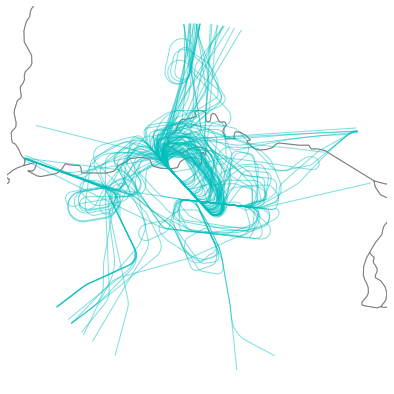

In [5]:
from traffic.drawing import countries

with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())
    ax.add_feature(countries())
    traffic[go.flight_ids].plot(ax, alpha=0.5, color="c")

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


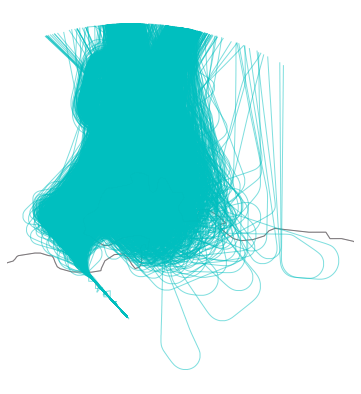

In [14]:
no_ga = [i for i in traffic.flight_ids if i not in go.flight_ids]
t = traffic[no_ga].query("initial_flow == '162-216' & runway == '14'")
# t = traffic[no_ga].query("runway == '14'")

with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())
    ax.add_feature(countries())
    t.plot(ax, alpha=0.5, color="c")

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/4414 [00:00<?, ?it/s]

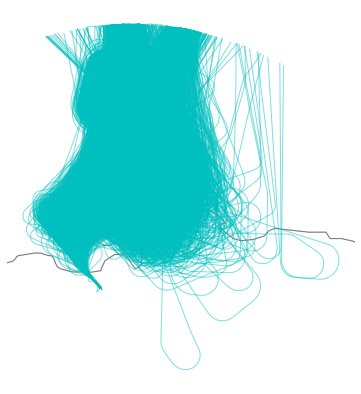

In [15]:
from traffic.data import navaids

def til_FAF(flight):
    g = flight.query("distance < (1.5*1.850)")
    if g is None:
        return None
    return flight.before(g.stop)


t = t.distance(navaids["OSNEM"]).pipe(til_FAF).eval(desc="")

with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())
    ax.add_feature(countries())
    t.plot(ax, alpha=0.5, color="c")

In [16]:
t = t.assign_id().resample(200).eval(desc = "", max_workers = 50)

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/traffic/core/flight.py:1304: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  .assign(tz_naive=lambda d: d.timestamp.astype("datetime64[ns]"))
/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/traffic/core/flight.py:1304: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use ob

  0%|          | 0/4414 [00:00<?, ?it/s]

In [17]:
t = Traffic.from_flights(
        flight.assign(
            timedelta=lambda r: (r.timestamp - flight.start).apply(
                lambda t: t.total_seconds()
            )
        )
        for flight in t
    )

In [18]:
t = t.compute_xy(projection=EuroPP())

In [19]:
t.to_pickle("../../deep_traffic_generation/data/traffic_162-216_noga_tilFAF.pkl")

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Checking for Nan

In [21]:
a =Traffic.from_file("../../deep_traffic_generation/data/traffic_noga_tilFAF.pkl")
a

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
2FPLF_000,200
SWR225Z_9573,200
SWR2277_9603,200
SWR2277_9604,200
SWR2277_9605,200
SWR2277_9606,200
SWR2277_9607,200
SWR2277_9608,200
SWR2277_9609,200


In [24]:
a.data.isnull().sum().sum()

484800

In [28]:
is_NaN = a.data[["track", "groundspeed", "altitude", "timedelta"]].isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = a.data[row_has_NaN]
rows_with_NaN.flight_id.unique()

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['DLH5RV_2018', 'DLH5RV_2020', 'DLH8AC_2120', 'DLH8AF_2137',
       'DLH8XA_2205', 'DLH8XA_2206', 'HMJ185_4579', 'TAP922N_13557',
       'TAP922N_13558', 'TAP922N_13559', 'TAP924C_13581', 'TAP924C_13582',
       'TAP924C_13584', 'TAP932N_13690', 'TAP932N_13691', 'TAP932N_13692'],
      dtype=object)

In [39]:
test = [i for i in a.flight_ids if i not in rows_with_NaN.flight_id.unique()]
no_nan = a[test]

/cluster/home/kruu/.conda/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
no_nan.to_pickle("../../deep_traffic_generation/data/traffic_noga_tilFAF.pkl")